In [93]:
import pandas as pd
# 读入数据
data = pd.read_csv('train.csv')  # 假设数据文件存在当前目录下

In [94]:
data.info()   #显示数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [95]:
data.describe()  #对数据进行统计分析，显示数量 均值 标准差 最小值 下四分位数 中位数 上四分位数 最大值

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1    233
0     81
Name: Survived, dtype: int64
    男性   女性
0  468   81
1  109  233


Text(0, 0.5, '人数')

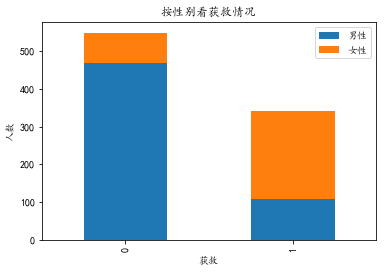

In [96]:
import matplotlib.pyplot as plt

#jupyter中专用的，用于显示图像
%matplotlib inline    

#以下两句用于正常显示汉字
from pylab import mpl   
mpl.rcParams['font.sans-serif'] = ['Kaiti']

#分别找出男性和女性中Survived为0、1的人数
Survived_m = data.Survived[data.Sex == 'male'].value_counts()  #value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值在该列中有多少重复值。
Survived_f = data.Survived[data.Sex == 'female'].value_counts()
print(Survived_f )
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f}) #以字典类型组建数据帧，列标题为男性和女性
print(df)

df.plot(kind = 'bar', stacked = True) #stacked表示柱状图是并排显示还是堆叠显示
plt.title(u'按性别看获救情况') 
plt.xlabel(u'获救')
plt.ylabel(u'人数')

#根据图中可以看出男性和女性的获救和死亡的比例明显不同，说明性别对目标值有影响，应将其作为特征值用于目标值的判断

    获救  未获救
S  217  427
C   93   75
Q   30   47


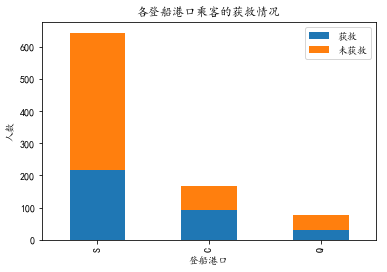

In [97]:
#这里换了一个角度研究特征值和目标值的关系，看不同登船港口的人中获救和未获救的人数
Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()

df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
print(df)
df.plot(kind = 'bar', stacked = True)
plt.title(u'各登船港口乘客的获救情况')
plt.xlabel(u'登船港口')
plt.ylabel(u'人数')
plt.show()

#从结果可见，从不同的港口登船的人的获救和未获救的比例明显不同，因此可以得出登船港口和目标值相关

In [98]:
#print(data.head())
# 删除姓名、ID、船票（票号）、客舱（客舱号）等无关信息，axis=0 删除行，=1 删除列
data.drop(['Name','PassengerId','Ticket','Cabin'], axis=1, inplace=True)
# 用平均值或众数填充缺失数据
#print(data.head())
data['Age'] = data['Age'].fillna(data['Age'].mean())   #data['Age'].mean()表示Age的平均数，fillna()表示填充空值的格，data['Age']表示data中的Age列


In [99]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())  #均值填充

data_Em = data['Embarked'].value_counts()   #data['Embarked'].value_counts(),用于表格Embraked列中有多少个不同值，并计算每个不同值在该列中有多少重复值，其按照重复值从多到少的顺序排列
print(data_Em)
data['Embarked'].value_counts().index[0]
#index[0]对应于重复值最多的那个数值的索引值（登船地点），即 众数。
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])#用众数填充空值

# 将性别与登船港口进行独热编码，因为sex和Embarked中的值均为字符串，无法进行公式的计算，因此需要将其转化为数值，独热编码是一种方式，将特征量分解成
#含有其数值的多个特征量，值为0、1，如sex特征可以分解为Sex_male,Sex_female两个特征量，其值分别为0，1,由于Sex_male,Sex_female两个特征量是完全相关的
#只要有一列，两外一列不增加任何信息，因此可以将其中一列丢掉，一般是用参数“drop_first=True”丢掉第一列，
dumm = pd.get_dummies(data[['Sex','Embarked']], drop_first=True)
print(dumm.head())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
   Sex_male  Embarked_Q  Embarked_S
0         1           0           1
1         0           0           0
2         0           0           1
3         0           0           1
4         1           0           1


In [100]:
data = pd.concat([data, dumm], axis=1)#按列融合数据，将Sex_male  Embarked_Q  Embarked_S列添加到原数据中
print(data.head())
data.drop(['Sex','Embarked'], axis=1, inplace=True)   #删除'Sex','Embarked'列

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Sex_male  \
0         0       3    male  22.0      1      0   7.2500        S         1   
1         1       1  female  38.0      1      0  71.2833        C         0   
2         1       3  female  26.0      0      0   7.9250        S         0   
3         1       1  female  35.0      1      0  53.1000        S         0   
4         0       3    male  35.0      0      0   8.0500        S         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [101]:
# 数据缩放（归一化）
data['Age']=(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data['Fare']=(data['Fare']-data['Fare'].min())/( data['Fare'].max()-data['Fare'].min())
print(data.head())


   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  0.271174      1      0  0.014151         1           0   
1         1       1  0.472229      1      0  0.139136         0           0   
2         1       3  0.321438      0      0  0.015469         0           0   
3         1       1  0.434531      1      0  0.103644         0           0   
4         0       3  0.434531      0      0  0.015713         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [102]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)     #去掉目标值，作为训练的自变量
y = data.Survived                     #提取目标值
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   #划分训练集和测试集

In [104]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'liblinear') 
#有很多参数可选，下面为完整的参数，很多可以是默认的，几种重要的参数选择
#进一步的了解，请参考：https://www.cnblogs.com/volcao/p/9387838.html
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#         penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#          verbose=0, warm_start=False)
#solver : 字符串,取值 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},
#默认是 ‘liblinear’. 如果数据集比较小，则 ‘liblinear’是很好的选择；
#如果数据集很大，用‘sag’ and ‘saga’； 如果是多分类任务，则用 ‘newton-cg’, 
#‘sag’, ‘saga’ and ‘lbfgs’ ； ‘liblinear’ 只能用于二分类问题。 
#‘newton-cg’, ‘lbfgs’ and ‘sag’只处理 L2 范式的正则项，而 ‘liblinear’ and ‘saga’ 只处理 L1范式的正则项.


LR.fit(X_train, y_train)   #训练模型
y_test_pre = LR.predict(X_test)   #对测试集进行预测
#print(y_test_pre)
test = pd.concat([X_test,y_test], axis=1)    #这里将X_test和实际的目标值进行融合
test['y_test_pred'] = y_test_pre    #将预测结果也作为一列加上，可以通过数据查看，哪些样例预测对了，哪些预测错了
print(test)


print('训练集准确率：\n', LR.score(X_train, y_train))
print('验证集准确率：\n', LR.score(X_test, y_test))

     Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
432       2  0.522493      1      0  0.050749         0           0   
612       3  0.367921      1      0  0.030254         0           1   
463       2  0.597889      0      0  0.025374         1           0   
387       2  0.447097      0      0  0.025374         0           0   
593       3  0.367921      0      2  0.015127         0           1   
822       1  0.472229      0      0  0.000000         1           0   
634       3  0.107816      3      2  0.054457         0           0   
468       3  0.367921      0      0  0.015078         1           1   
480       3  0.107816      5      2  0.091543         1           0   
556       1  0.597889      1      0  0.077294         0           0   
244       3  0.371701      0      0  0.014102         1           0   
542       3  0.132948      4      2  0.061045         0           0   
547       2  0.367921      0      0  0.027058         1           0   
742   

solver : 字符串,取值 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},默认是 ‘liblinear’.
如果数据集比较小，则 ‘liblinear’是很好的选择； 如果数据集很大，用‘sag’ and ‘saga’；
如果是多分类任务，则用 ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ ； ‘liblinear’ 只能用于二分类问题。
‘newton-cg’, ‘lbfgs’ and ‘sag’只处理 L2 范式的正则项，而 ‘liblinear’ and ‘saga’ 只处理 L1范式的正则项.
